# Module 11: Visualization with Matplotlib, Pandas, and Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 11.1   Getting started with matplotlib 


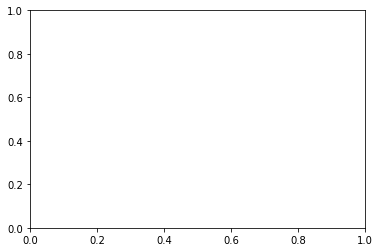

In [2]:
# creating a single elment grid (1x1) inside the figure

fig, ax = plt.subplots(nrows=1, ncols=1)

# the nrows= and ncols= indicates how many rows and columns of subplots there will be.
# It creates a single figure along with a grid of axes objects
# For example nrows=2, and ncols=1 will generate two rows of subplots (vertically stacked)
# nrows=1 and ncols=2 will generate two columns of subplots placed horizontly next to each other 

# TRY CHANGING THESE PARAMETERS YOURSELF

In [3]:
# We can get size of the figure with by applying .get_size method on figure

fig.get_size_inches()

array([6., 4.])

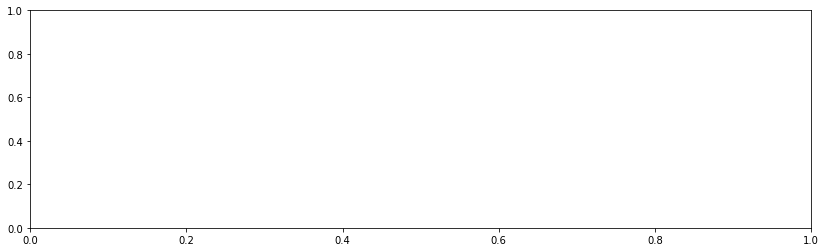

In [4]:
# We can change the figure size by .set_size_inches

fig.set_size_inches(14, 4)
fig

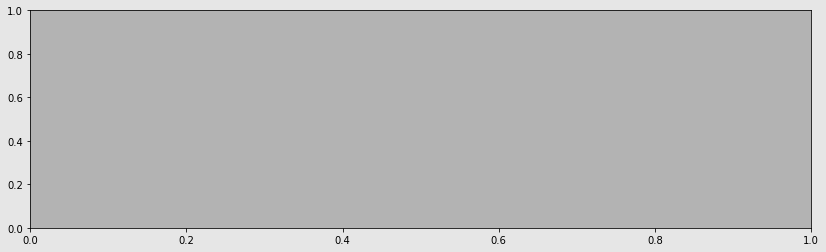

In [5]:
# setting colors for figure and axes -- Default is grey color. The smaller the value, the darker the color shade. 

fig.set_facecolor('.9')
ax.set_facecolor('.7')
fig

# the first line sets the light grey border, second line sets the dark grey interior 

In [6]:
# outputing the spines

spines = ax.spines
spines

OrderedDict([('left', <matplotlib.spines.Spine at 0x926a2b0>),
             ('right', <matplotlib.spines.Spine at 0x926a3c8>),
             ('bottom', <matplotlib.spines.Spine at 0x926a4e0>),
             ('top', <matplotlib.spines.Spine at 0x926a5f8>)])

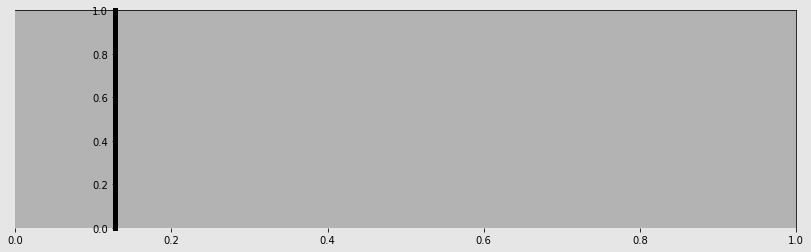

In [7]:
# moving the left spine inwards, and making it thicker

spine_left = spines['left']
spine_left.set_position(('outward', -100))
spine_left.set_linewidth(5)


# making the bottom spine to disappear

spine_bottom = spines['bottom']
spine_bottom.set_visible(False)
fig

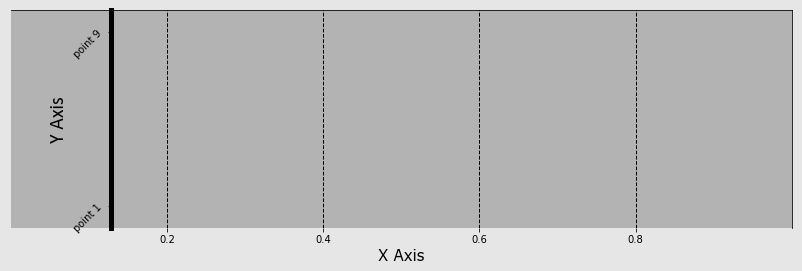

In [8]:
# Using xaxis and yaxis attributes to change define grid, ticks axis-labels etc

ax.xaxis.grid(True, which='major', linewidth=1, color='black', linestyle='--')
ax.xaxis.set_ticks([.2, .4, .6, .8])
ax.xaxis.set_label_text('X Axis', family='Verdana', fontsize=15)

# using ax object to define grid, ticks axis-labels etc
ax.set_ylabel('Y Axis', family='Calibri', fontsize=20)
ax.set_yticks([.1, .9])
ax.set_yticklabels(['point 1', 'point 9'], rotation=45)
fig

# USE ax OBJECT TO REPRODUCE RESULTS for X-AXIS

# 11.2. Visualizing data with matplotlib

In [9]:
movie = pd.read_csv('data/movie.csv')

# creating a median movie budget for each year

med_budget = movie.groupby('title_year')['budget'].median() / 1e6
med_budget.head()

title_year
1916.0    0.385907
1920.0    0.100000
1925.0    0.245000
1927.0    6.000000
1929.0    0.379000
Name: budget, dtype: float64

In [10]:
med_budget.tail()

title_year
2012.0    17.0
2013.0    20.0
2014.0    15.0
2015.0    14.4
2016.0    22.5
Name: budget, dtype: float64

In [11]:
# creating a 5-year rolling window and calculating mean

med_budget_roll = med_budget.rolling(5, min_periods=1).mean()
med_budget_roll.tail()

title_year
2012.0    20.893
2013.0    19.893
2014.0    19.100
2015.0    17.980
2016.0    17.780
Name: budget, dtype: float64

In [12]:
# creating variable 'years' that contains the last 5 years: 2012 to 2016

years = med_budget_roll.index.values
years[-5:]

array([2012., 2013., 2014., 2015., 2016.])

In [13]:
# creating a variable 'budget' that contains rolling mean budget of last 5 years
budget = med_budget_roll.values
budget[-5:]

array([20.893, 19.893, 19.1  , 17.98 , 17.78 ])

Text(0,0.5,'Millions of Dollars')

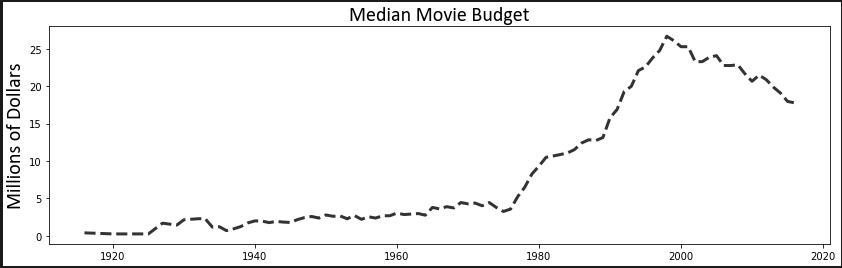

In [14]:
# specifying figure size, line width for the graph frame, and color of outer-edge of the graph frame 

fig, ax = plt.subplots(figsize=(14,4), linewidth=5, edgecolor='.1')

# specifying variables to plot (years, budget), linestyle of the linegraph, color of the line
# default color is grey

ax.plot(years, budget, linestyle='--', linewidth=3, color='.2')

# specifying font size, and font family through keyword arguments (kwargs)
text_kwargs=dict(fontsize=20, family='calibri')  #note the ue of dictionary 

# using the selected fontsize, font to create title and y-label
ax.set_title('Median Movie Budget', **text_kwargs)
ax.set_ylabel('Millions of Dollars', **text_kwargs)

## 11.2.1   Creating line graph and bar chart in the same figure

In [15]:
# calculating movie counts

movie_count = movie.groupby('title_year')['budget'].count()
movie_count.tail()

title_year
2012.0    191
2013.0    208
2014.0    221
2015.0    192
2016.0     86
Name: budget, dtype: int64

### Continuing with the above line graph, we now introduce the bars (representing movie counts)  

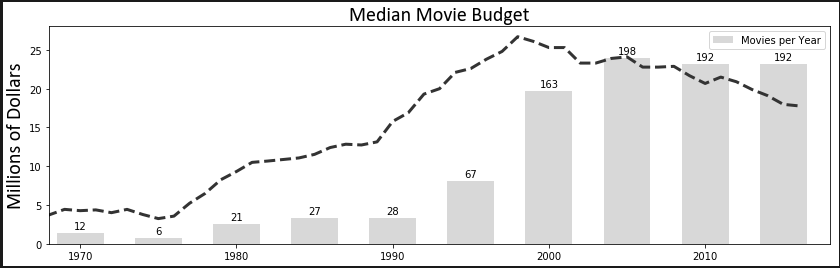

In [16]:
# normalizing movie counts 
ct = movie_count.values
ct_norm = ct / ct.max() * budget.max()

# defining conditions for selecting every 5th year after 1970; 
#     years % 5 is selecting every 5th year 
#     The codition below defines a criterion (remainder after dividing year by 5 should be zero)
#     and year > 1970. The criterion is assigned to avariable fifth_year.

fifth_year = (years % 5 == 0) & (years >= 1970)
years_5 = years[fifth_year]

# extracting every 5th year's count, and normalized count
ct_5 = ct[fifth_year]
ct_norm_5 = ct_norm[fifth_year]

# CONTINUING WHERE WE LEFT OFF THE PREVIOUS LINE GRAPH (which is already drawn)

# creating bars on x-axis as Axes object ax.bar
# syntax >> Axes.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
# x= x-variable, height=y-variable, width= bar width, alpha= transparency

ax.bar(years_5, ct_norm_5, width=3, facecolor='.5', alpha=.3, label='Movies per Year')
ax.set_xlim(1968, 2018)    # setting limits on x-axis

# Writing counts on top of bars
# This is done by the following syntax:
# Axes.text(x, y, s, ha= 'param')
#      where x,y are the coordinates of position where text is to be placed
#      s is the string of text to be placed
#      'ha' is the horizontal alignment

# In this example: 
#   x= years_5, y= ct_norm_5 + .5. The text has to be placed 0.5 distance above 
#                   edge of y-coordinate of the bar
#   ha ='center' 

# text placement atop the bars is by iteration, one bar at a time.

for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax.text(x, y + .5, str(v), ha='center')

# zip() function creates tuples; ha stands for horizontal alignment; 
# str(v) converts the argument v (ct_5 i.e count every 5th year) to string.     

# creating the legend
ax.legend()
fig

## 11.2.2   Plotting data from dataFrames with matplotlib -- scatterplots

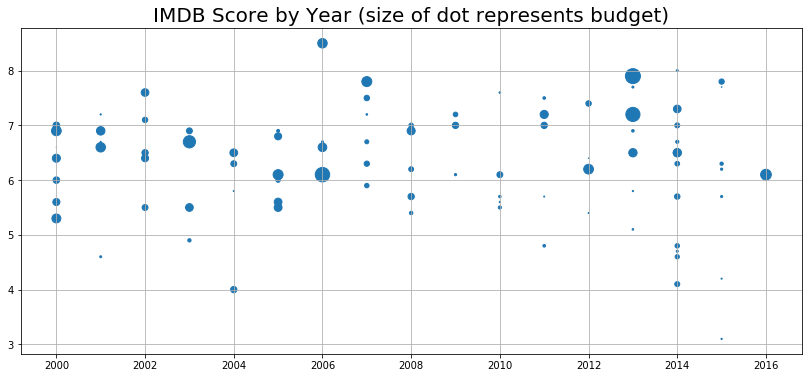

In [17]:
cols = ['budget', 'title_year', 'imdb_score', 'movie_title']
m = movie[cols].dropna()

# m = movie[['budget', 'title_year', 'imdb_score', 'movie_title']].dropna()
m['budget2'] = m['budget'] / 1e6

# selecting a random sample of 100 from years >= 2000
np.random.seed(0)
movie_samp = m.query('title_year >= 2000').sample(100)

# specifying variable to be measured along each axis
# The variable representing the size of each point in the scatter is movie budget (s=budget)
fig, ax = plt.subplots(figsize=(14,6))
ax.scatter(x='title_year', y='imdb_score', s='budget2', data=movie_samp)

ax.set_title('IMDB Score by Year (size of dot represents budget)' , size=20)

ax.grid(True)

# 11.3    Plotting basics with pandas
## 11.3.1  Two-variable Bar Charts - using dataFrame variables

In [18]:
df = pd.DataFrame(index=['Atiya', 'Abbas', 'Cornelia', 'Stephanie', 'Monte'], 
                  data={'Apples':[20, 10, 40, 20, 50],
                        'Oranges':[35, 40, 25, 19, 33]})
df

,Apples,Oranges
Atiya,20,35
Abbas,10,40
Cornelia,40,25
Stephanie,20,19
Monte,50,33


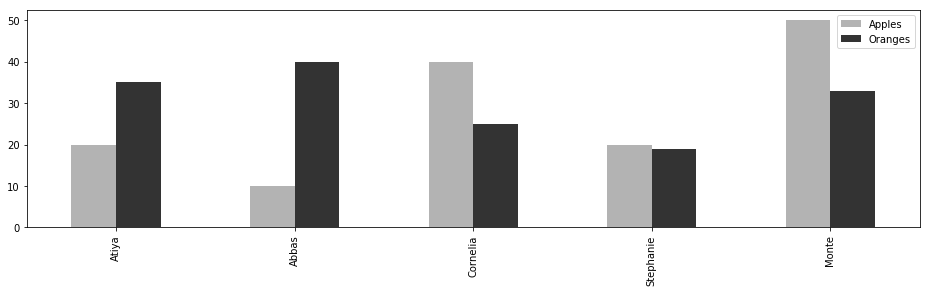

In [19]:
color = ['.7', '.2']

# using the .plot method on dataframe
df.plot(kind='bar', color=color, figsize=(16,4))

## 11.3.2   Kernal density estimates (KDEs) 

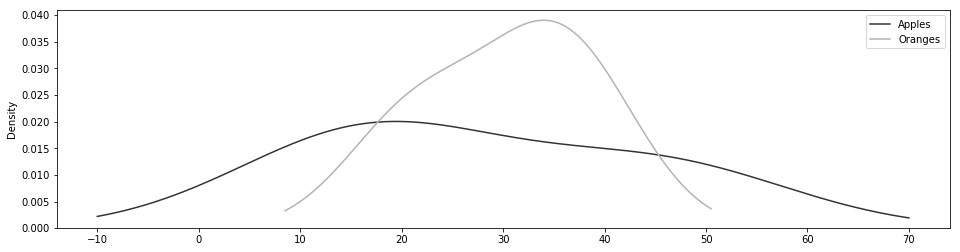

In [20]:
df.plot(kind='kde', color=['.2', '.7'], figsize=(16,4))

## 11.3.3   Multiple two-variable plots together 

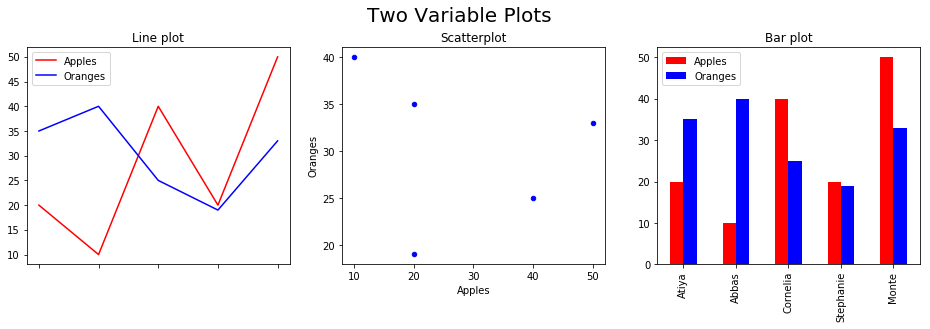

In [21]:
# We will draw line-plots, scatterplot, and two-variable bar charts in a single figure

# defining figure and 3 Axes objects
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))

# defining figure title
fig.suptitle('Two Variable Plots', size=20, y=1.02)

# two variable line plots
df.plot(kind='line', color=['red', 'blue'], ax=ax1, title='Line plot')

# scatter plot
df.plot(x='Apples', y='Oranges', kind='scatter', color=['blue'], 
        ax=ax2, title='Scatterplot')

# two-variable bar chart
df.plot(kind='bar', color=['red', 'blue'], ax=ax3, title='Bar plot')

## 11.3.4   Several one-variable plots in the same figure 

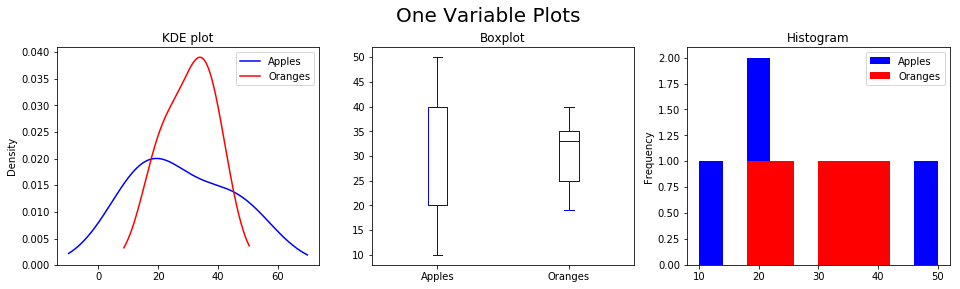

In [22]:
# defining the figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
fig.suptitle('One Variable Plots', size=20, y=1.02)

# defining the KDE plot
df.plot(kind='kde', color=['blue', 'red'], ax=ax1, title='KDE plot')

# defining the box-plot
df.plot(kind='box', ax=ax2, title='Boxplot', color='blue')

# defining the histogram
df.plot(kind='hist', color=['blue', 'red'], ax=ax3, title='Histogram')

## 11.3.5    Specifying dataFrame columns to be ploted   

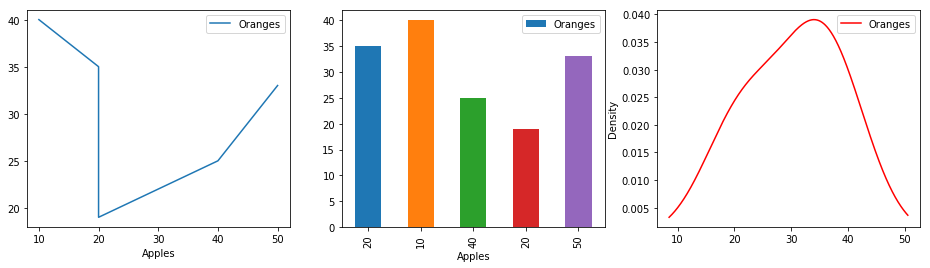

In [23]:
#defining the figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))

# creating line graph --- pre sorting values before plotting 
df.sort_values('Apples').plot(x='Apples', y='Oranges', kind='line', ax=ax1)

# creating bar chart -- bar height representing oranges for each level of apples
df.plot(x='Apples', y='Oranges', kind='bar', ax=ax2)

# KDE plot for apples
df.plot(x='Apples', kind='kde', color ='red', ax=ax3)